### Nathan Reed
### Professor Hua
### Project Milestone
### October 29th, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import BorderlineSMOTE
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from mlxtend.plotting import plot_confusion_matrix
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Loading in the Data

In [2]:
df = pd.read_csv('CompanyBankruptcyData.csv') # reads in the dataset
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Data Exploration

In [3]:
df.shape # gives the shape of the dataset

(6819, 96)

In [4]:
df.info() # gives data type of every variable in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe() # describes the data using summary statistics for each variable

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.isnull().sum().sum() # this will show us how many total missing values there are

0

In [7]:
df.duplicated().sum() # this will show us if there are any duplicated values

0

# EDA

Text(0.5, 1.0, 'Bankruptcy Distribution')

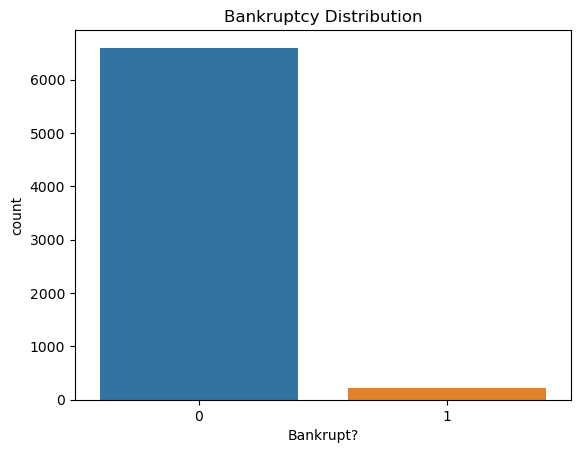

In [8]:
sns.countplot(df['Bankrupt?']) # creaes histagram of the distribution of the variable Bakruptcy?
plt.title("Bankruptcy Distribution")

# Reducing Variables and Starting Model Preparation

In [9]:
X = df.drop('Bankrupt?', axis = 1) # Separates variables to response and explanatory variables
y = df['Bankrupt?']

In [10]:
pipeline = Pipeline(steps = [('constant', DropConstantFeatures()), ('correlated', DropCorrelatedFeatures()),
    ('duplicate', DropDuplicateFeatures())])
X = pipeline.fit_transform(X)
X.shape # gets rid of variables that are constant, correlated, or duplicate 

(6819, 69)

In [11]:
smote = BorderlineSMOTE()
X, y = smote.fit_resample(X, y)# makes y variable become balanced

Text(0.5, 1.0, 'Bankruptcy Distribution')

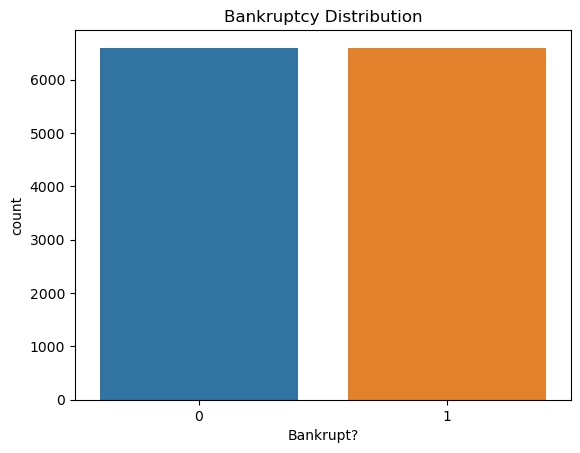

In [12]:
sns.countplot(y) # creaes histagram of the distribution of the variable Bakruptcy?
plt.title("Bankruptcy Distribution")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # splits the data into test and training sets

Logistic regression
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1334
           1       0.70      0.61      0.65      1306

    accuracy                           0.68      2640
   macro avg       0.68      0.68      0.68      2640
weighted avg       0.68      0.68      0.68      2640



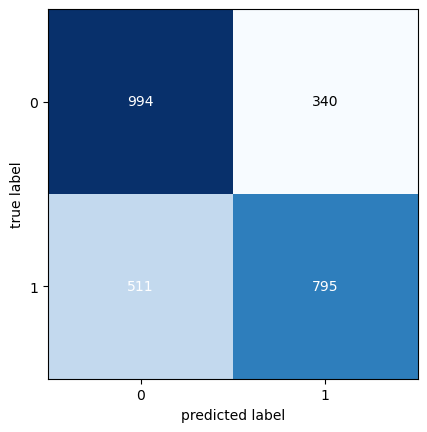



Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1334
           1       0.98      0.99      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640



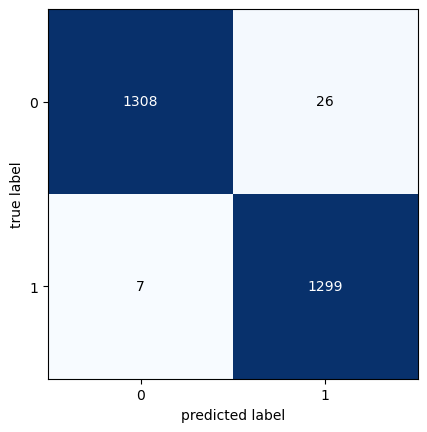



Decision Trees
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1334
           1       0.94      0.98      0.96      1306

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



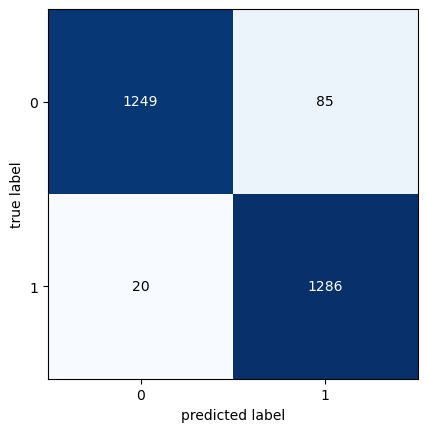



KNeighbourClassifier
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1334
           1       0.88      0.99      0.93      1306

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



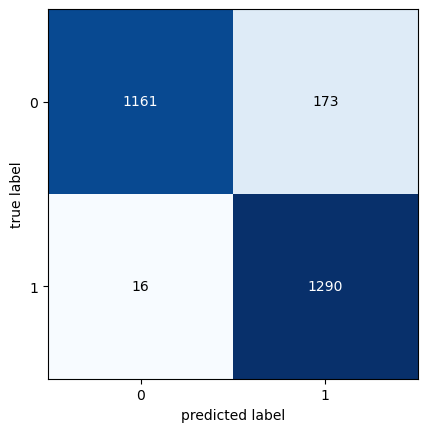

In [14]:
models = [[LogisticRegression(), "Logistic regression"], # tests the models that I want to test on the data
         [RandomForestClassifier(n_estimators = 20), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"]]
accuracies = []
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(classification_report(y_test, y_pred))
    accuracies.append([name, acc])
    cnf = confusion_matrix(y_test,y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

The best 2 models are Random Forest and K-Nearest Neighbor. I will end up using Random Forest as it is more accurate.

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)# gives accuracy of the data

Accuracy: 0.9886363636363636


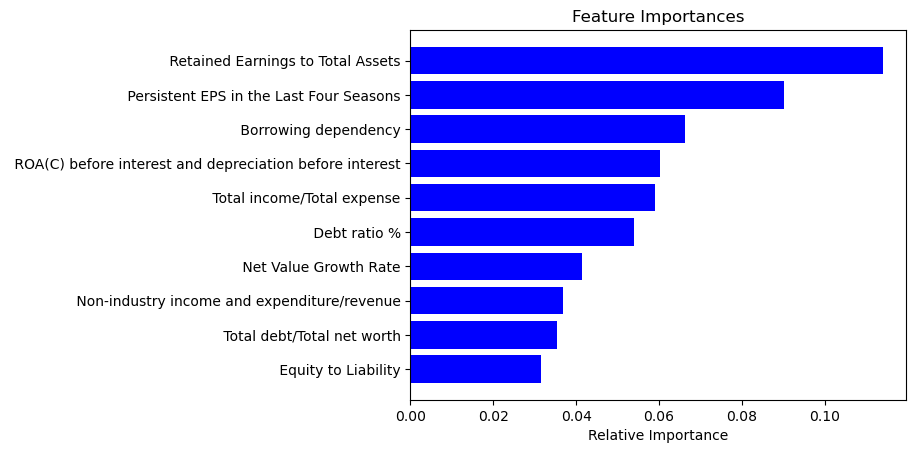

In [16]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
num_features = 10 
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()# shows the 10 most important features